<a href="https://colab.research.google.com/github/yeison34k/diplomado_analisis_datos_machine_learning_python/blob/main/Notebook07_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 14**

## **Contenido**

- <a href="#nan"> Valores nulos/faltantes</a><br>
- <a href="#nor"> Estandarización y normalización</a><br>
- <a href="#cat"> Variables categóricas</a><br>


<p><a name="nan"></a></p>

## **Valores nulos/faltantes**

El manejo de los valores nulos es una tarea de preprocesamiento esencial. Si tengo valores nulos en mi conjunto de datos ¿Cómo se expresan en los datos? ¿Debo mantener las instancias con valores nulos o debería reemplazarlos? En segundo caso, ¿con qué valores deberían reemplazarse?

Debemos tener en cuenta que eliminar una instancia completa porque tiene un único valor nulo puede ser una mala decisión y hacer que perdamos información que podría ser relevante. De igual manera, si mantenemos una instancia con muchos valores nulos, esto podría hacer que nuestro modelo no tenga el mejor rendimiento.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tomasate/Diplomado_ML/main/datasets/data/nivel_1/Data/auto.csv', index_col='Unnamed: 0')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Para mirar si nuestro conjunto de datos tiene valores nulos, podemos utilizar el método `isna`:

In [ ]:
df.isna()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
np.array([True, False]).any()

True

In [ ]:
df.isna().any()

symboling            False
normalized-losses    False
make                 False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke                True
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
city-L/100km         False
horsepower-binned     True
diesel               False
gas                  False
dtype: bool

Para examinar el número de valores nulos por característica aplicamos la función de agreagación `sum`

In [ ]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

Más que el número de valores nulos, estamos interesados en saber qué porcentaje de los datos son valores nulos

In [ ]:
df.isna().sum()/len(df)

symboling            0.000000
normalized-losses    0.000000
make                 0.000000
aspiration           0.000000
num-of-doors         0.000000
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
bore                 0.000000
stroke               0.019900
compression-ratio    0.000000
horsepower           0.000000
peak-rpm             0.000000
city-mpg             0.000000
highway-mpg          0.000000
price                0.000000
city-L/100km         0.000000
horsepower-binned    0.004975
diesel               0.000000
gas                  0.000000
dtype: float64

La estrategia que utilicemos para tratar los valores nulos dependerá de:

* **Porcentaje de valores nulos:**  Si el porcentaje es muy elevado se debe buscar una forma de obtener dichos datos faltantes. Si esto no es posible lo mejor será eliminar la característica. Si el porcentaje es pequeño puede pensar en una estrategia para reemplazar los valores nulos.

* **Naturaleza de la variable y su distribución:** Si la variable es de tipo numérica y tiene una distribución normal, la mejor estrategia será reemplazar por la media de la variable. Si se tienen datos atípicos que afecten significativamente la media, lo mejor será reemplazar por la mediana.

  Si la variable es de tipo categórica, se puede pensar en reemplazar por el valor más frecuente en la variable.

Por ejemplo, en nuestro caso, la variable `stroke` es numérica, tiene un bajo porcentaje de valores nulos y tiene una distribución normal, por lo que la mejor estrategia será reemplazar los valores nulos por la media.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


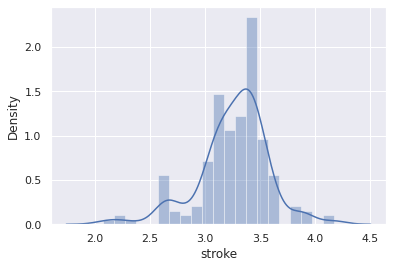

In [ ]:
sns.distplot(df.stroke);

Para reemplazar los valores faltantes con estrategias comunes, `sklearn.impute` proporciona el transformador `SimpleImputer`

In [ ]:
from sklearn.impute import SimpleImputer

SimpleImputer?

Inicialicemos el transformador

In [ ]:
imputer = SimpleImputer()

Note que por defecto utiliza la estrategia de llenado por la media

In [ ]:
imputer.fit_transform(df[["stroke"]])

In [ ]:
df.stroke.isna().sum()

4

In [ ]:
df.stroke = imputer.fit_transform(df[["stroke"]])

In [ ]:
df.stroke.isna().sum()

0

Esta tarea de llenado de valores nulos se puede realizar de forma similar utilizando el método `fillna` de Pandas. Esta implementación de Pandas proporciona opciones para rellenar hacia adelante (`ffill`) o rellenar hacia atrás (`bfill`), muy útil cuando los datos están ordenados.


In [ ]:
df.stroke.fillna(df.stroke.mean(), inplace=True)

In [ ]:
df.stroke.isna().sum()

0

Se pueden utilizar otras estrategias más complejas donde se agrupen los datos de acuerdo a algunas características particulares, y a partir de estas reemplazar los valores nulos.

# **Estandarización y normalización**

Los modelos que son funciones suaves de la entrada, como la regresión lineal, la regresión logística o cualquiera que involucre una matriz, se ven afectados por la escala de la entrada. Los modelos basados ​​en árboles, por otro lado, no les importa nada. Si el modelo es sensible a la escala de las características de entrada, el escalamiento de las características podría ayudar.

Antes de aplicar cualquier transformación de escala, es muy importante dividir los datos en los conjuntos de entrenamiento y prueba. Si escalamos los datos antes de este paso, los datos de entrenamiento (y de prueba) no estarán escalados ya sea con la media o con la norma de los datos de entrenamiento como tal.







In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tomasate/Diplomado_ML/main/datasets/data/nivel_1/Data/FuelConsumption.csv')
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['ENGINESIZE', 'FUELCONSUMPTION_HWY']]
y = df.CO2EMISSIONS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Estandarización**

La estandarización es una transformación que centra los datos eliminando el valor medio de cada característica y luego la escala dividiendo las características (no constantes) por su desviación estándar. Después de estandarizar los datos, la media será cero y la desviación estándar uno.

\begin{equation}
x' = \frac{x-\mu}{\sigma}
\end{equation}

La estandarización puede mejorar drásticamente el rendimiento de los modelos. Algunos modelos (por ejemplo SVM y Modelos lineales regularizados) asumen que todas las características se centran alrededor de cero y tienen una varianza del mismo orden. Si una característica tiene una varianza que es órdenes de magnitud mayor que otras, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba.

Podemos estandarizar nuestros datos con el transformador `StandarScaler` de Sklearn. Antes de aplicarlo, entrenemos un modelo sin estandarizar los datos:



In [ ]:
from sklearn.preprocessing import StandardScaler

StandardScaler?

Ahora con las características estandarizadas:

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression().fit(X_train, y_train)
  
print(f"R2 : \t\t{modelo.score(X_test, y_test)}")
print(f"Intercepto : \t{modelo.intercept_}")
print(f"Coeficientes : \t{modelo.coef_}")

R2 : 		0.8527031036959104
Intercepto : 	81.46947429943009
Coeficientes : 	[23.16780322 10.30122921]


In [ ]:
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

modelo_scaled = LinearRegression().fit(X_train_scaled, y_train)
  
print(f"R2 : \t\t{modelo_scaled.score(X_test_scaled, y_test)}")
print(f"Intercepto : \t{modelo_scaled.intercept_}")
print(f"Coeficientes : \t{modelo_scaled.coef_}")

R2 : 		0.8468915233804435
Intercepto : 	257.2567409144197
Coeficientes : 	[32.7564178  28.70600494]


Además de mejorar el desempeño del modelo, en términos computacionales, el proceso de estandarización nos permite tener una mejor interpretación del modelo.

**Normalización**

La normalización es el proceso de escalar muestras individuales para tener una norma unitaria. Escalar las entradas a las normas de la unidad es una operación común para la clasificación o agrupamiento de texto.

\begin{equation}
x' = \frac{x-\text{min}(x)}{\text{max}(x)-\text{min}(x)}
\end{equation}

Este escalador funciona mejor en casos en los que la distribución no es gaussiana o la desviación estándar es muy pequeña. Sin embargo, es sensible a valores atípicos, por lo que si hay valores atípicos en los datos, es mejor considerar otro escalador.

La escala de características es útil en situaciones en las que las características de entrada difieren enormemente en escala. Por ejemplo, el número de visitantes diarios a un sitio de comercio electrónico popular puede ser de cien mil, mientras que el número real de ventas puede ser de miles. Si ambas características se incluyen en un modelo, el modelo deberá equilibrar su escala. Escalas drásticamente variables en las características de entrada pueden generar problemas de estabilidad para el algoritmo de entrenamiento del modelo. En esas situaciones, es una buena idea estandarizar los datos.

Podemos normalizar los datos utilizando el transformador `MinMaxScaler` de sklearn.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

norm.fit_transform(df[['FUELCONSUMPTION_HWY']])

array([[0.11538462],
       [0.17948718],
       [0.05769231],
       ...,
       [0.31410256],
       [0.28205128],
       [0.33974359]])

In [ ]:
print(norm.fit_transform(df[['FUELCONSUMPTION_HWY']]).max(), norm.fit_transform(df[['FUELCONSUMPTION_HWY']]).min())

1.0000000000000002 0.0


# **Variables categóricas**

Algunos algoritmos solo reciben variables numéricas como entrada, por lo que necesitaremos transformar las variables categoricas a variables numericas para poder alimentar el algoritmo.

Antes de ver cómo realizar la conversión, es importante mencionar algo: Lo que vamos a querer hacer es convertir las variables categoricas ordinales con una codificación tal que preserve esa nocion de orden que tienen estas variables. y para Las variables categoricas nominales, vamos a tener otro tipo de codificación.

Ahora por qué esto es importante? Supongamos que vamos a alimentar un algoritmo que solo toma variables numericas. Supongamos además que transformamos una variable categorica nominal mediante una codificacion ordinal.

Puede pasar que el algoritmo le dé más peso a un valor particular de acuerdo al valor numerico que se le ha asignado con la codificacion ordinal, pero este valor en realidad no tiene nada que ver con ese ordenamiento con el cual se hizo la codificacion ordinal. Por lo que la mejor opción sería realizar una codificación nominal para evitar este tipo de comportamiento del algoritmo. O en el caso contrario, si realizamos una codificación nominal a una variable categorica ordinal, podríamos perder capacidad de predicción ya que el algoritmo no es capaz de acceder a esa información ordinal intrinseca de la variable.

Sin embargo, hay que dejar claro que esto que he mencionado no es la última palabra. Como vamos a ver, muchos aspectos del ML, no tienen un fundamento teórico claro, por lo que este tipo de cuestiones se resuelven experimentalmente.

Es decir, más allá de las buenas prácticas que podamos seguir, vamos a encontrar casos en el que estas prácticas o el sentido común no son garantía para obtener el mejor rendimiento posible.

Entonces, vamos a ver cómo realizar los diferentes tipos de codificación, pero la última palabra para saber qué tipo de codificiación utilizar la dará el rendimiento del algoritmo.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tomasate/Diplomado_ML/main/datasets/data/nivel_1/Data/auto.csv', index_col='Unnamed: 0')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

**Label Encoding**

Comencemos por la codificacion de las variables categoricas ordinales.

La codificación ordinal la podemos implementar mediante el método `OrdinalEncoder` de Sklearn

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

In [ ]:
df['num-of-cylinders-num'] = oe.fit_transform(df[['num-of-cylinders']])

In [ ]:
df[['num-of-cylinders', 'num-of-cylinders-num']].sort_values(by = 'num-of-cylinders-num').drop_duplicates()

,num-of-cylinders,num-of-cylinders-num
68,eight,0.0
8,five,1.0
135,four,2.0
15,six,3.0
17,three,4.0
46,twelve,5.0
52,two,6.0


Noten que la codificación no se hace en el orden esperado. Esto se da debido a que no se ha hecho explícita la naturaleza de la variable

In [ ]:
df.dtypes

symboling                 int64
normalized-losses         int64
make                     object
aspiration               object
num-of-doors             object
body-style               object
drive-wheels             object
engine-location          object
wheel-base              float64
length                  float64
width                   float64
height                  float64
curb-weight               int64
engine-type              object
num-of-cylinders         object
engine-size               int64
fuel-system              object
bore                    float64
stroke                  float64
compression-ratio       float64
horsepower              float64
peak-rpm                float64
city-mpg                  int64
highway-mpg               int64
price                   float64
city-L/100km            float64
horsepower-binned        object
diesel                    int64
gas                       int64
num-of-cylinders-num    float64
dtype: object

Podemos usar la función `Categorical` de Pandas para convertir la variable a una variable categórica:

In [ ]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
pd.Categorical(df['num-of-cylinders'], categories=['two','three','four', 'five','six','eight', 'twelve'])

['four', 'four', 'six', 'four', 'five', ..., 'four', 'four', 'six', 'six', 'four']
Length: 201
Categories (7, object): ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']

In [ ]:
df['num-of-cylinders'] = pd.Categorical(df['num-of-cylinders'], categories=['two','three','four', 'five','six','eight', 'twelve'])

Estas variables tienen un objeto `cat` que, al igual que `str` en el caso de las variables tipo `object`, permiten acceder a cierta información. Particularmente el atributo codes nos proporciona la codificación que buscamos:

In [ ]:
df.dtypes

symboling                  int64
normalized-losses          int64
make                      object
aspiration                object
num-of-doors              object
body-style                object
drive-wheels              object
engine-location           object
wheel-base               float64
length                   float64
width                    float64
height                   float64
curb-weight                int64
engine-type               object
num-of-cylinders        category
engine-size                int64
fuel-system               object
bore                     float64
stroke                   float64
compression-ratio        float64
horsepower               float64
peak-rpm                 float64
city-mpg                   int64
highway-mpg                int64
price                    float64
city-L/100km             float64
horsepower-binned         object
diesel                     int64
gas                        int64
num-of-cylinders-num     float64
dtype: obj

In [ ]:
df['num-of-cylinders'].sort_values().cat.codes

52    0
53    0
54    0
55    0
17    1
     ..
71    5
70    5
69    5
68    5
46    6
Length: 201, dtype: int8

In [ ]:
df['num-of-cylinders-num'] = df['num-of-cylinders'].sort_values().cat.codes

In [ ]:
df[['num-of-cylinders', 'num-of-cylinders-num']].sort_values(by = 'num-of-cylinders-num').drop_duplicates()

,num-of-cylinders,num-of-cylinders-num
52,two,0
17,three,1
0,four,2
4,five,3
11,six,4
71,eight,5
46,twelve,6


Alternativamente podemos utilizar un mapeo directamente 

In [ ]:
mapeo = {'two':2 ,'three':3 ,'four': 4, 'five': 5 ,'six': 6 ,'eight' : 8, 'twelve': 12}

df['num-of-cylinders-num'] = df['num-of-cylinders'].map(mapeo)

In [ ]:
df[['num-of-cylinders', 'num-of-cylinders-num']].sort_values(by = 'num-of-cylinders-num').drop_duplicates()

,num-of-cylinders,num-of-cylinders-num
52,two,2
17,three,3
0,four,4
4,five,5
11,six,6
71,eight,8
46,twelve,12


**One-Hot Encoding**

Ahora, para las variables categoricas nominales usaremos otro tipo de codificación, conocida como one-hot encoding. Esencialmente, cada característica categórica con $n$ categorías se transforma en $n$ características binarias.

Esto lo podemos implementar mediante el transformador `OneHotEncoder` de Sklearn:

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,num-of-cylinders-num
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1,4
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1,4
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1,6
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1,4
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1,5


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
ohe = OneHotEncoder(sparse=False)

In [ ]:
ohe.fit_transform(df[['drive-wheels']])

Ahora, si la variable solo toma dos valores, mantener dos columnas sería redundante

In [ ]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [ ]:
ohe.fit_transform(df[['drive-wheels']])

Esta codificación también la podemos implementar con Pandas mediante el método `get_dummies`:

In [ ]:
pd.get_dummies(df[['drive-wheels']], drop_first=True)

,drive-wheels_fwd,drive-wheels_rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0
...,...,...
196,0,1
197,0,1
198,0,1
199,0,1
